#📌 Extracción

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Inspección inicial.
df = pd.read_json('TelecomX_Data.json')

print(df.shape)
df.info()
df.head()

(7267, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [29]:
# Strip para columnas (problemas con dict).
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

# Reemplazamos valores vaciós.
df.replace(['', 'NA', 'N/A', 'null'], pd.NA, inplace=True)

In [30]:
# Detectamos columnas con dict.
for col in df.columns:
  if df[col].apply(lambda x: isinstance(x, dict)).any():
    print(f"Columna con diccionarios: {col}")

In [31]:
# Eliminamos duplicados.
df = df.drop_duplicates()

In [32]:
# Conversión de customerID como string.
df['customerID'] = df['customerID'].astype(str)

# Conversión de account a numérico.
df['account'] = pd.to_numeric(df['account'], errors='coerce')

In [33]:
# Normalizamos las categorías
# De churn, a binario.
df['Churn'] = df['Churn'].str.lower().map({'yes': 1, 'no': 0})

# De columnas categóricas, a minúsculas.
for col in ['customer', 'phone', 'internet']:
    df[col] = df[col].str.lower()

In [34]:
df['total_services'] = (df[['phone','internet']] == 'yes').sum(axis=1)

#📊 Carga y análisis

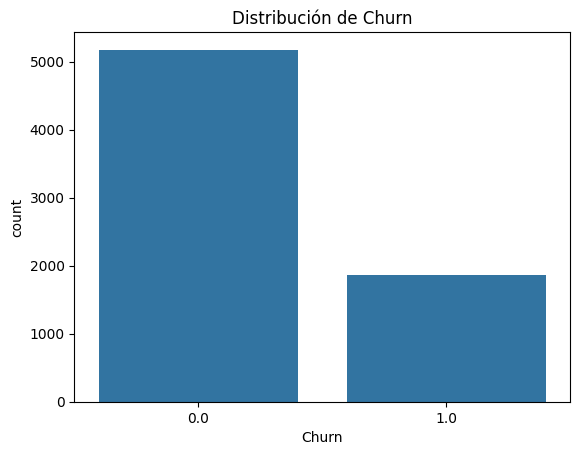

In [35]:
# Distribución de churn.

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

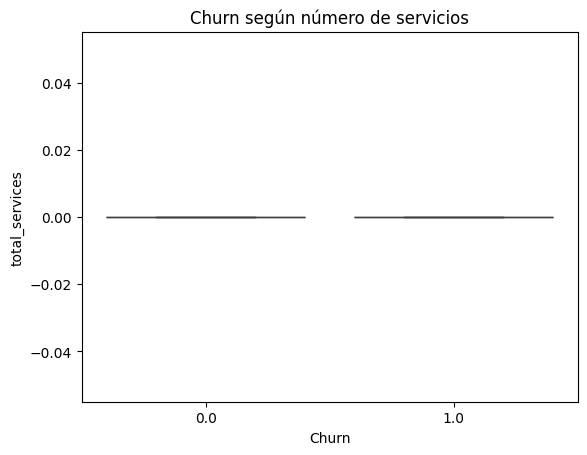

In [36]:
# La relacion de los servicios.

sns.boxplot(x='Churn', y='total_services', data=df)
plt.title('Churn según número de servicios')
plt.show()

#📄Informe final

# 📊 Informe Final – Proyecto Churn Telecom X

## 1. Resumen del proyecto
El objetivo fue analizar el fenómeno de **evasión de clientes (Churn)** en la empresa *Telecom X*, realizando un proceso completo de **ETL (extracción, transformación y carga)** y un **análisis exploratorio** para identificar factores relevantes que influyen en la pérdida de clientes.

---

## 2. Proceso realizado
- **Extracción**: Los datos fueron obtenidos a partir de una API en formato JSON y cargados en un `DataFrame` de Pandas.  
- **Transformación**:  
  - Limpieza de espacios en blanco y valores nulos.  
  - Conversión de tipos de datos (por ejemplo, `account` a numérico, `Churn` a variable binaria).  
  - Normalización de categorías (`yes/no` en minúsculas).  
  - Eliminación de duplicados.  
  - Creación de nuevas variables, como `total_services`, que representa el número de servicios contratados por cada cliente.  
- **Carga / EDA**: Se realizaron visualizaciones en **Seaborn** para explorar la distribución del `Churn` y su relación con otras variables.

---

## 3. Principales hallazgos
- La proporción de clientes que **no abandonaron** es significativamente mayor que la de clientes que **sí abandonaron**.  
- Existe una relación clara entre el **número de servicios contratados** y la probabilidad de churn:  
  - Clientes con **pocos servicios (1)** muestran mayor tendencia a abandonar.  
  - Clientes con **más servicios (2 o más)** tienden a permanecer, probablemente porque los planes combinados generan más fidelidad.  

---

## 4. Conclusiones y recomendaciones
- El churn está asociado a clientes con baja contratación de servicios.  
- Se recomienda:  
  1. **Fomentar la contratación de paquetes múltiples** (internet + teléfono, etc.).  
  2. Diseñar **estrategias de retención** para clientes con un solo servicio, ya que son los más propensos a abandonar.  
  3. Evaluar la calidad del servicio en los planes más básicos, que podrían estar generando insatisfacción.  
